# Achmad Nur Bani Suta (2209106016)

## Import Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("games.csv")

df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


## Visualisai Data Menggunakan Bar Plot

In [3]:
df.loc[df['Release Date'] == 'releases on TBD', 'Release Date'] = 'Dec 31, 2024'

In [4]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['bulan'] = df['Release Date'].dt.month
df['tahun'] = df['Release Date'].dt.year
df['hari'] = df['Release Date'].dt.day

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


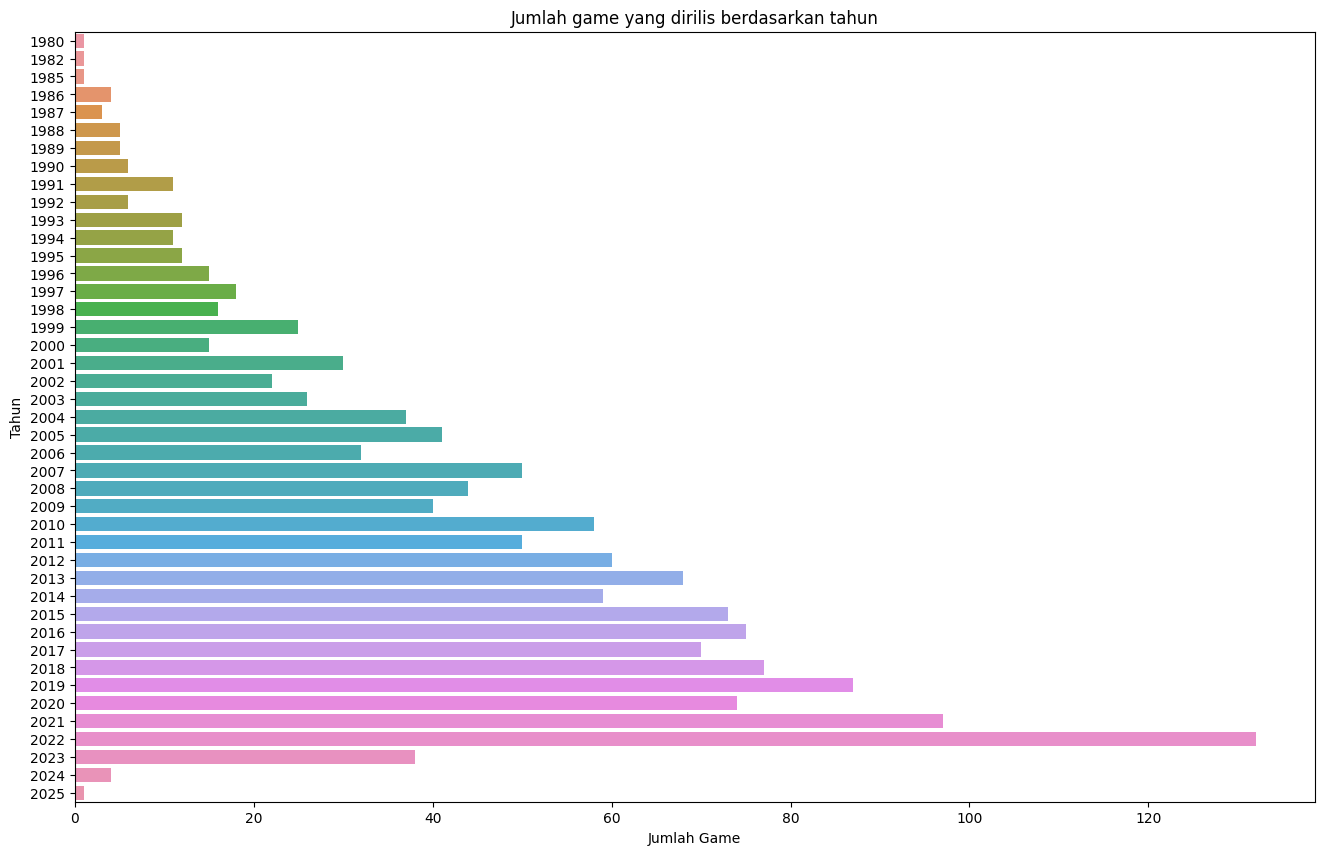

In [5]:
plt.figure(figsize=(16, 10))
plt.title('Jumlah game yang dirilis berdasarkan tahun')
sns.countplot(data=df, y='tahun')
plt.xlabel('Jumlah Game')
plt.ylabel('Tahun')
plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa tahun dengan game rilis terbanyak berada pada tahun 2022 dan untuk paling sedikit berada pada 1980, 1982, 1985 dan 2025

## Visualisai Data Menggunakan Line Plot

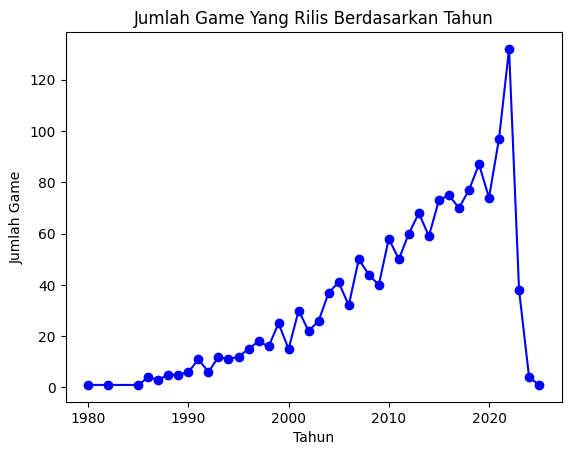

In [6]:
jumlah_game = df.groupby(df['tahun']).size()

plt.plot(jumlah_game.index, jumlah_game.values, marker='o', linestyle='-', color='blue')

plt.title('Jumlah Game Yang Rilis Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')

plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa tahun dengan game rilis terbanyak berada pada tahun 2022 dan untuk paling sedikit berada pada 1980, 1982, 1985 dan 2025

## Visualisai Data Menggunakan Pie Chart

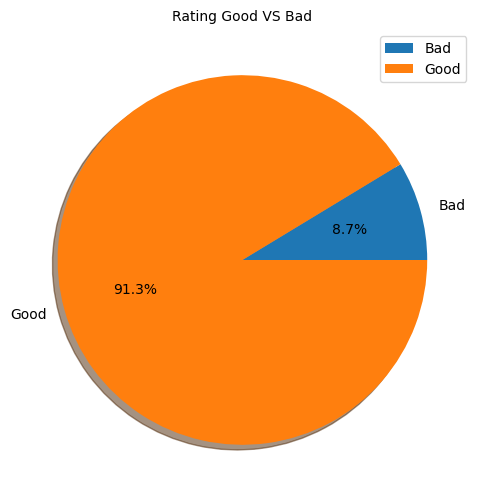

In [7]:
data = [df.Rating[df['Rating']<3].count(), df.Rating[df['Rating']>=3].count()]
label = ['Bad', 'Good']

figure, axes = plt.subplots(figsize=(8, 6))
axes.pie(data, 
         labels=label, 
         autopct='%.1f%%',
         shadow=True)

plt.title("Rating Good VS Bad", size = 10)
plt.legend()
plt.show()

Menurut grafik diatas dapat disimpulkan :
  - Terdapat 91.3% dengan review yang baik
  - Terdapat 8.7% dengan review yang kurang baik

## Visualisai Data Menggunakan Heatmap

In [8]:
def drop_columns(df: pd.DataFrame, cols_to_drop: list = None, 
                 idx_to_drop: list = None) -> pd.DataFrame:
    new_df = df.copy()

    if cols_to_drop is not None:
        new_df = new_df.drop(columns=cols_to_drop)

    if idx_to_drop is not None:
        new_df = new_df.drop(index=idx_to_drop)

    return new_df


def convert_str_num_to_int(df: pd.DataFrame, col_names: list) -> pd.DataFrame:
    new_df = df.copy()
    
    for col in col_names:
        new_df[col] = new_df[col].str.replace("K", "000")

        new_df[col] = new_df[col].map(lambda x: int(float(x) * 1000) if '.' in x else int(x))

    return new_df

In [9]:
numerical_cols = ["Plays", "Playing", "Backlogs", "Wishlist"]

df = convert_str_num_to_int(df, numerical_cols)

In [10]:
cols_names = ["Unnamed: 0", "Team", "Reviews", "Summary", "Number of Reviews", "Times Listed", "hari", "bulan", "tahun"]

df = drop_columns(df, cols_names)

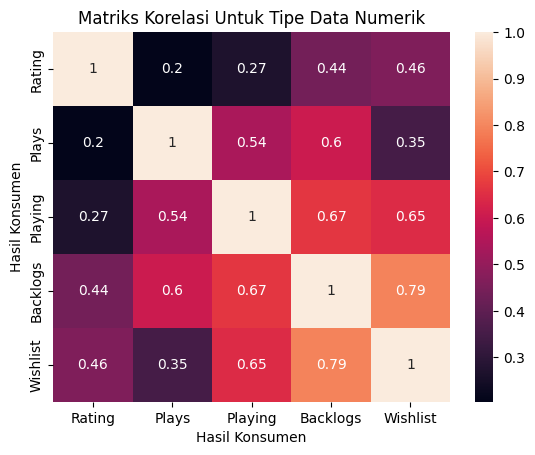

<Figure size 1000x800 with 0 Axes>

In [11]:
korelasi_matriks = df.corr(method ='pearson',numeric_only = True)

sns.heatmap(korelasi_matriks, annot = True)

plt.title("Matriks Korelasi Untuk Tipe Data Numerik")
plt.xlabel("Hasil Konsumen")
plt.ylabel("Hasil Konsumen")

plt.figure(figsize=(10, 8))  
plt.show()

Berdasarkan heatmap diatas dapat disimpulkan
  - Ada korelasi kuat antara backlogs dan wishlist
  - Terdapat beberapa korelasi antara rating dan backlogs